# SCS_3253_047 Machine Learning

### Final Project: April 5th, 2022

### Team members:

* Lucas Merrick
* Amitha Pillai
* Michael Tan
* Herbert Gnanaraja Richard Sundarrajan

### Project Overview:

The scientific objective of the Kepler Mission is to explore the structure and diversity of planetary systems, using a special-purpose spacecraft to measure light variations from thousands of distant stars, looking for planetary transits.


Kepler Objects of Interest (KOIs) are well vetted, periodic, transit-like events in the Kepler data. The Kepler Project identifies these objects from the Threshold-Crossing Events (TCE) list for further vetting. Some objects will be flagged as false positives.

### Objective: 
Predict classification of KOI from Kepler data (exoplanet candidate or false positive)

### Data Exploration:

* Dataset with 82 features, 9564 instances
    * Identification Columns, Exoplanet Archive Information, Project Disposition Columns
    * Transit Properties, Threshold-Crossing Event (TCE) Information, Stellar Parameters, Kepler Input Catalog (KIC) Parameters, Pixel-Based KOI Vetting Statistics


* Plot scatter matrix of features to evaluate data distributions, trends and understand relationship with other features
    * Mix of distributions: majority left/right skewed, some normally distributed
    * Some outliers observed


* Plot correlation to identify redundant features
    * High correlation found in subset of features
    
### Data source and acknowledgement:
This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program.

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

# 1. Data preparation

### Load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pathToFile = r"dataset/"
fileName = 'cumulative_values.csv'

In [4]:
rows = 86 # skip rows with column descriptions - only use this for file directly downloaded from archive

data = pd.read_csv(pathToFile+fileName, skiprows=rows, sep=",", index_col=0) # create dataframe
pd.set_option('display.max_columns', None) # show all columns

### Inspect data

In [5]:
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2670 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_vet_stat       9564 non-null   object 
 5   koi_vet_date       9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_disp_prov      9564 non-null   object 
 13  koi_comment        8355 non-null   object 
 14  koi_period         9564 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0          9564 

Based on data column descriptions, koi_pdisposition is selected as the target for prediction as this reflects the Disposition using Kepler Data. 

The attribute koi_disposition reflects the Exoplanet Archive disposition which includes an additional category (CONFIRMED) after the relevant parameters have been peer reviewed and accepted for publication in the astrophysical literature.

https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

### Scrub data

In [7]:
# remove columns with documentation data - not required for model
skip_attr = [ 
    'koi_fittype', 
    'koi_limbdark_mod', 
    'koi_parm_prov', 
    'koi_tce_delivname',
    'koi_quarters',
    'koi_trans_mod',
    'koi_datalink_dvr',
    'koi_datalink_dvs',
    'koi_sparprov'
]

df = data.iloc[:, 14:] # remove first 13 columns of identification and target data (includes koi_fpflag_xx)
df.drop(skip_attr, axis=1, inplace=True) # drop columns with documentation data
df.shape

(9564, 59)

In [8]:
df_clean = df.dropna(axis=1, how='all') # drop all NaN/null columns
df_clean = df_clean.loc[:, (df_clean.sum(axis=0) != 0)] # drop all columns with zero data
df_clean.shape

(9564, 51)

In [9]:
dataset = df_clean.dropna(axis=0, how='any').copy() # drop rows with any NaN/null values
dataset.shape

(6682, 51)

In [10]:
target_attr = 'koi_pdisposition'
target_vals = {'CANDIDATE': 1, 'FALSE POSITIVE': 0}

dataset[target_attr] = data[target_attr].map(target_vals) # get prediction labels
dataset.shape

(6682, 52)

In [11]:
dataset.describe()

,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,koi_pdisposition
count,6682.000000,6682.000000,6.682000e+03,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6.682000e+03,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000
mean,38.777867,158.642098,2.454992e+06,0.605141,5.287654,16708.224080,0.133194,3.824836,23.330560,0.166536,82.871100,1068.148908,2.811424e+03,39.599091,0.252134,0.412804,133.522835,724.861994,241.651990,1.457498,358.496558,1.242143,0.449457,5670.190661,4.341433,-0.107189,1.421751,1.003336,291.975904,43.875941,14.413355,14.980822,14.366893,14.170235,14.068562,13.127903,12.752744,12.678324,0.143600,19.465054,43.875770,-0.235452,-0.613978,-0.000202,0.000373,-0.026657,-0.078825,1.682620,-0.024833,-0.090366,1.624028,0.559713
std,86.853521,56.869574,5.686957e+01,0.789784,6.239584,59334.772312,0.688142,19.828442,333.353119,0.239006,14.292725,716.037790,3.099108e+04,85.157313,0.063389,0.102861,647.992745,3148.391731,754.438855,0.924514,519.823675,0.647403,0.441491,750.778924,0.372522,0.278427,3.513413,0.322740,4.751041,3.641148,1.234216,1.355618,1.236949,1.193451,1.171765,1.154115,1.132486,1.135072,0.247828,0.316735,3.641217,9.440263,12.805662,0.057976,0.068381,2.202001,2.439362,2.823965,2.169180,2.397582,2.797022,0.496459
min,0.259820,121.119423,2.454954e+06,0.000000,0.052000,0.000000,0.001289,0.000040,0.080000,0.006500,5.260000,92.000000,2.000000e-02,1.006000,-0.120600,0.127800,2.417437,7.105086,0.000000,1.000000,0.000000,1.000000,-1.000000,3198.000000,0.047000,-1.980000,0.207000,0.184000,279.856080,36.577381,7.391000,7.225000,7.446000,7.641000,6.702000,4.097000,3.014000,2.311000,0.000000,18.657037,36.576888,-275.600000,-397.620000,-4.000000,-0.800000,-21.500000,-75.900000,0.000000,-23.600000,-76.600000,0.000000,0.000000
25%,2.801644,132.754433,2.454966e+06,0.197000,2.392250,161.625000,0.012448,0.229335,1.380000,0.038300,84.080000,590.000000,2.865250e+01,5.680250,0.224000,0.334200,3.909304,11.011906,13.900000,1.000000,42.000000,1.000000,0.165700,5303.000000,4.269000,-0.240000,0.823000,0.839000,288.597337,40.793672,13.668000,14.146000,13.614000,13.448250,13.369000,12.455000,12.113000,12.051250,0.000000,19.239835,40.792885,-0.530000,-0.600000,-0.000210,-0.000210,-0.280000,-0.310000,0.152000,-0.270000,-0.320000,0.199000,0.000000
50%,8.480309,136.584645,2.454970e+06,0.570000,3.683150,426.150000,0.021419,0.929310,2.350000,0.079650,88.330000,892.000000,1.494600e+02,14.472350,0.267600,0.392800,5.255736,19.185801,25.600000,1.000000,134.000000,1.000000,0.504500,5733.500000,4.450000,-0.080000,0.977000,0.961000,292.186675,43.761240,14.672500,15.215000,14.627000,14.424500,14.315000,13.362000,12.953000,12.872000,0.004000,19.479207,43.761240,0.000000,-0.037500,0.000000,0.000000,0.000000,0.000000,0.510000,-0.002000,-0.016000,0.481000,1.000000
75%,25.947534,162.566610,2.454996e+06,0.899750,5.881750,1372.075000,0.077028,2.608907,11.580000,0.170075,89.640000,1346.000000,7.765325e+02,34.775000,0.296500,0.469500,12.924639,57.222467,76.5500

### Visualize data

In [12]:
df_plot = dataset.copy() # use dataset without any missing values

n_rows = len(df_plot)
m = 600 # select ~10% of dataset for plotting
idx = np.random.permutation(n_rows)[:m]
X_plot = df_plot.iloc[idx]

In [13]:
#Transit properties
koi_transit = X_plot[['koi_period', 'koi_time0bk', 'koi_time0',
                      'koi_impact', 'koi_duration', 'koi_depth', 
                      'koi_sma', 'koi_incl', 'koi_teq']].copy()

koi_coeff = X_plot[['koi_ror', 'koi_srho', 'koi_prad', 'koi_insol', 
                    'koi_dor', 'koi_ldm_coeff2', 'koi_ldm_coeff1']].copy()

#TCE Information
koi_tce = X_plot[['koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 
                  'koi_count', 'koi_num_transits', 'koi_tce_plnt_num']].copy()

#Stellar Parameters
koi_stellar = X_plot[['koi_steff', 'koi_slogg', 'koi_smet', 
                      'koi_srad', 'koi_smass', 'koi_bin_oedp_sig']].copy()

#KIC Parameters
koi_kic = X_plot[['koi_kepmag','koi_gmag', 'koi_rmag', 'koi_imag', 
                  'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']].copy()

# Pixel-Based KOI Vetting Statistics
koi_fwm = X_plot[['ra', 'dec', 'koi_fwm_sra', 'koi_fwm_sdec',
                  'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao',
                  'koi_fwm_pdeco','koi_fwm_stat_sig']].copy()

koi_prf = X_plot[['koi_dicco_mra', 'koi_dicco_mdec', 'koi_dicco_msky',
                  'koi_dikco_mra', 'koi_dikco_mdec', 'koi_dikco_msky']].copy()

xplot = [koi_transit, koi_coeff, koi_tce, koi_stellar, koi_kic, koi_fwm, koi_prf]

### Plot distributions

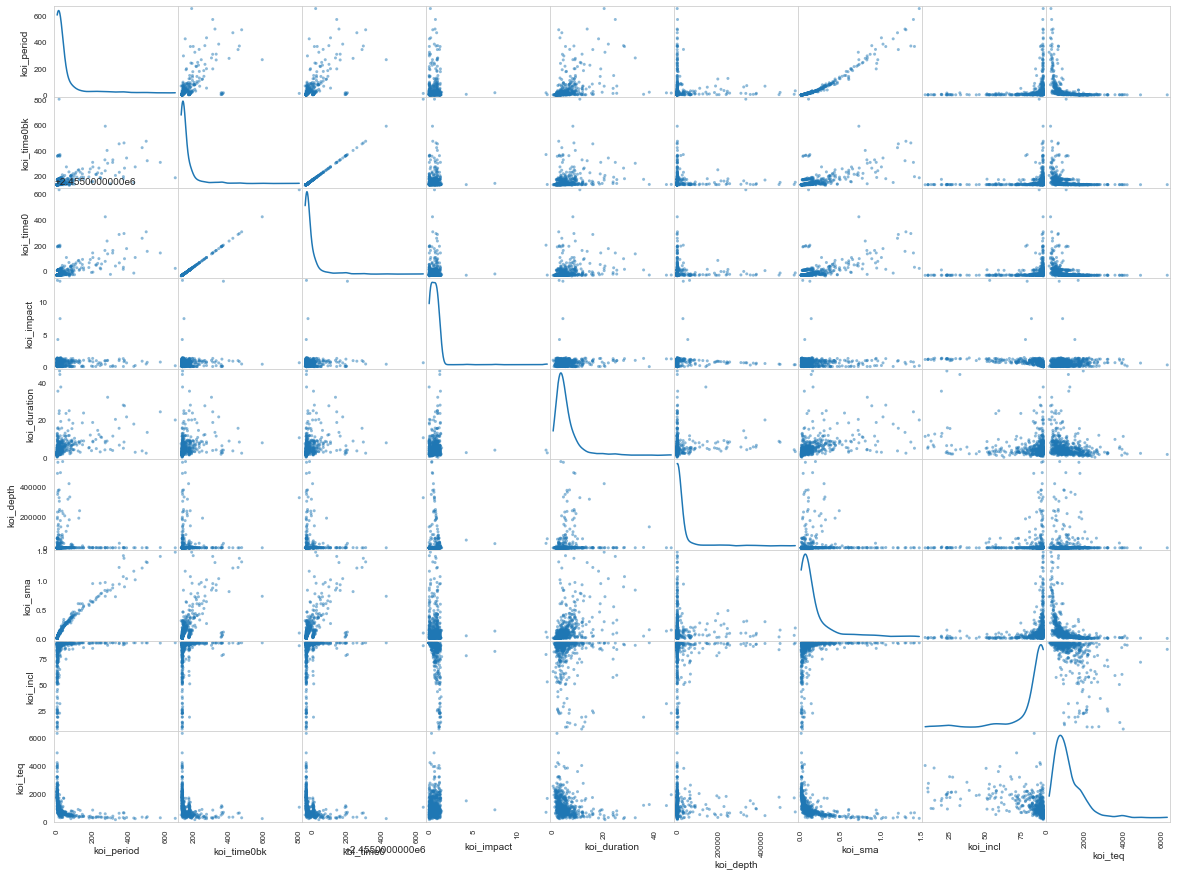

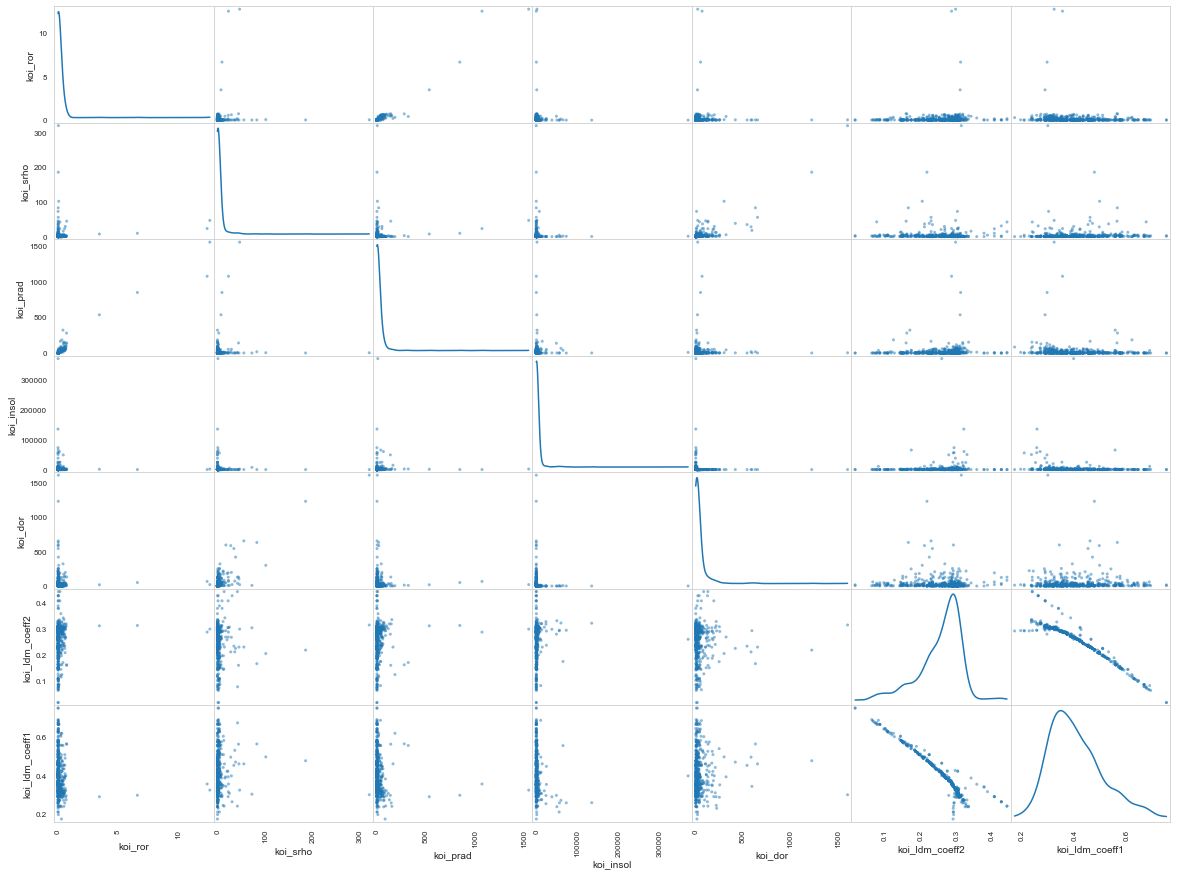

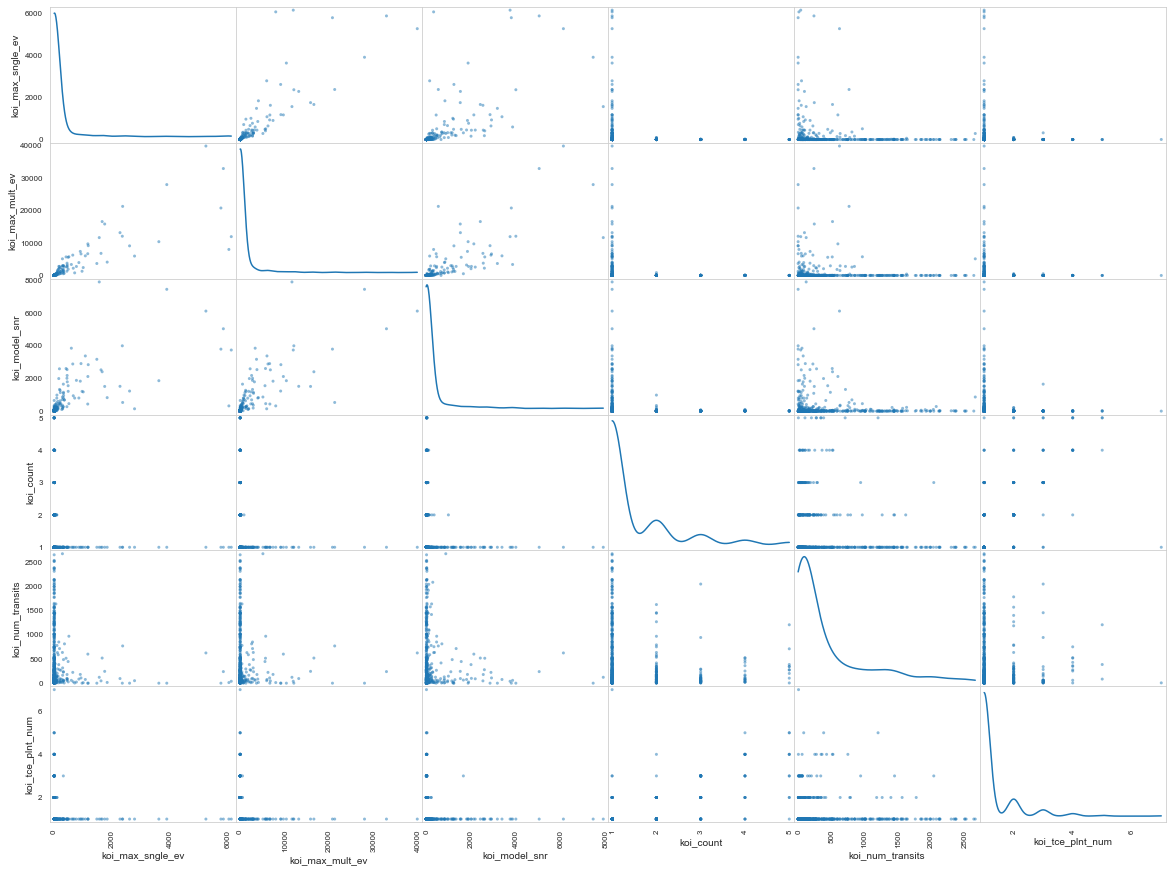

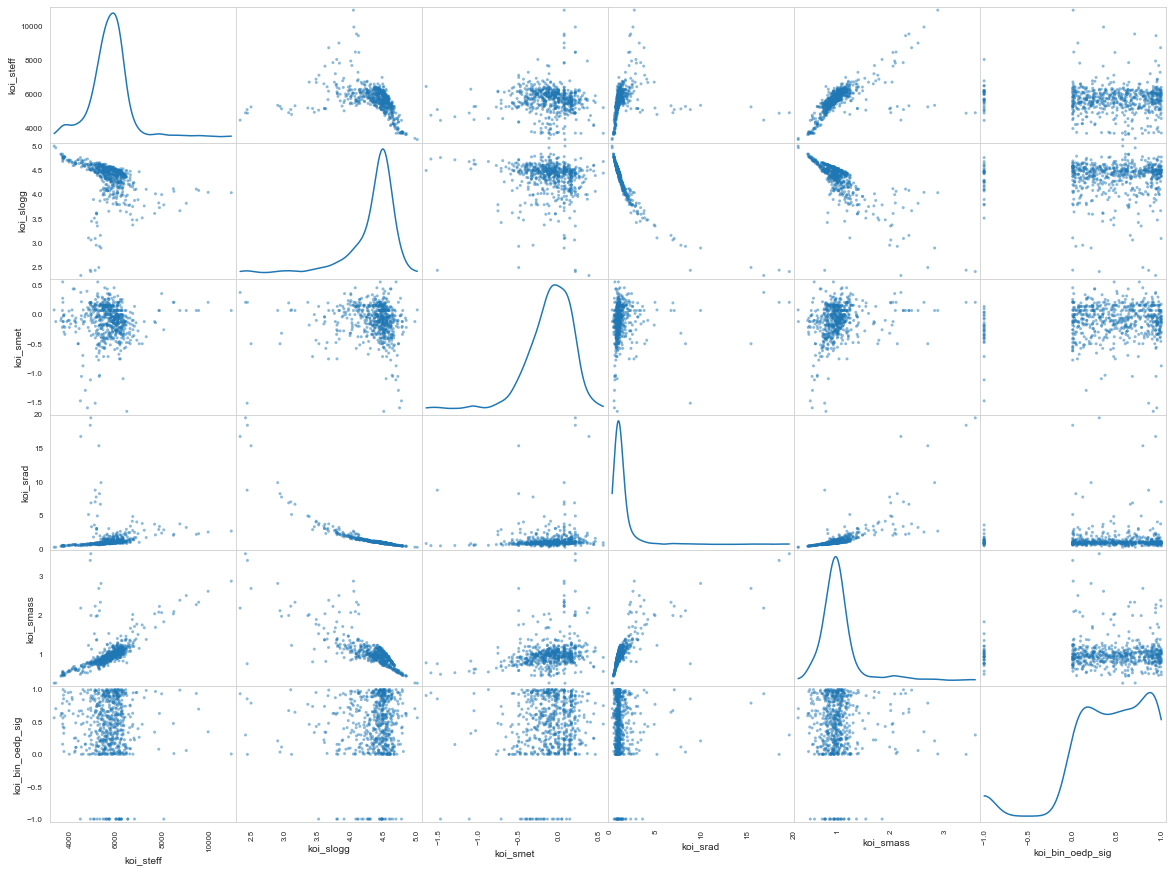

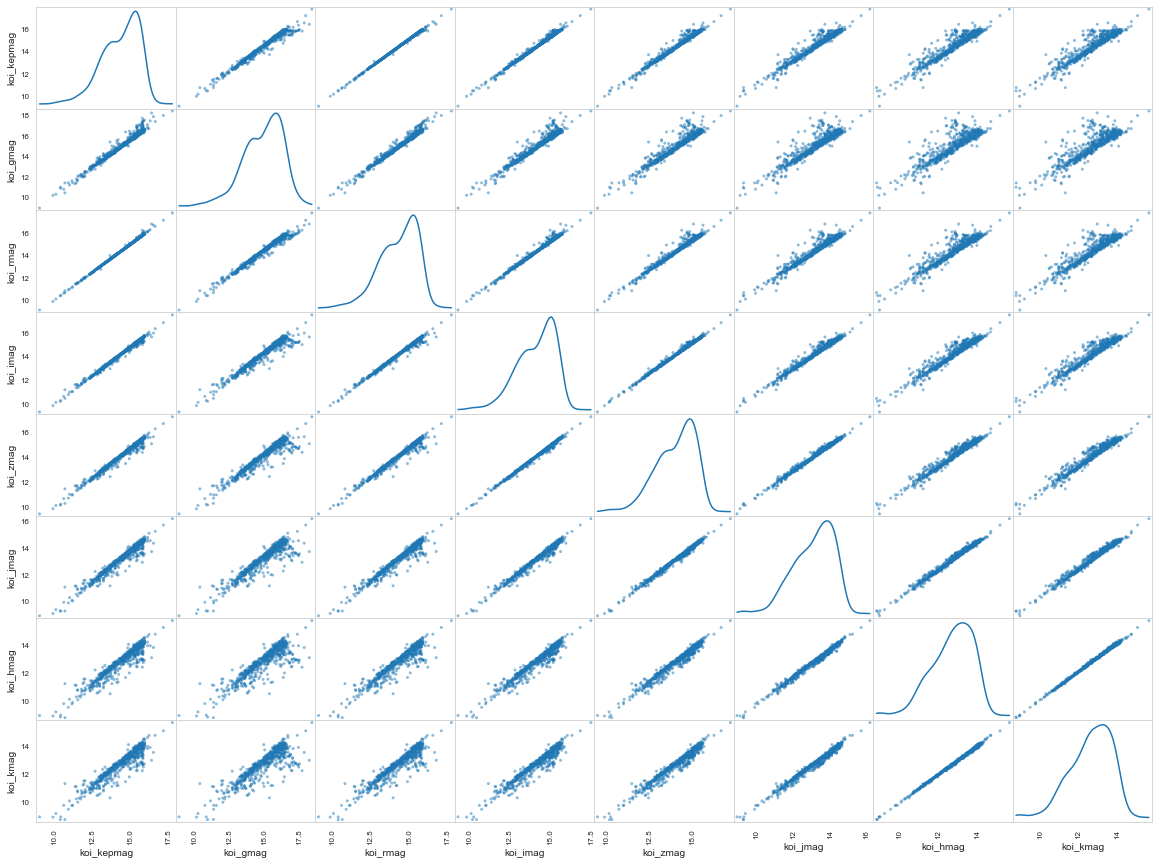

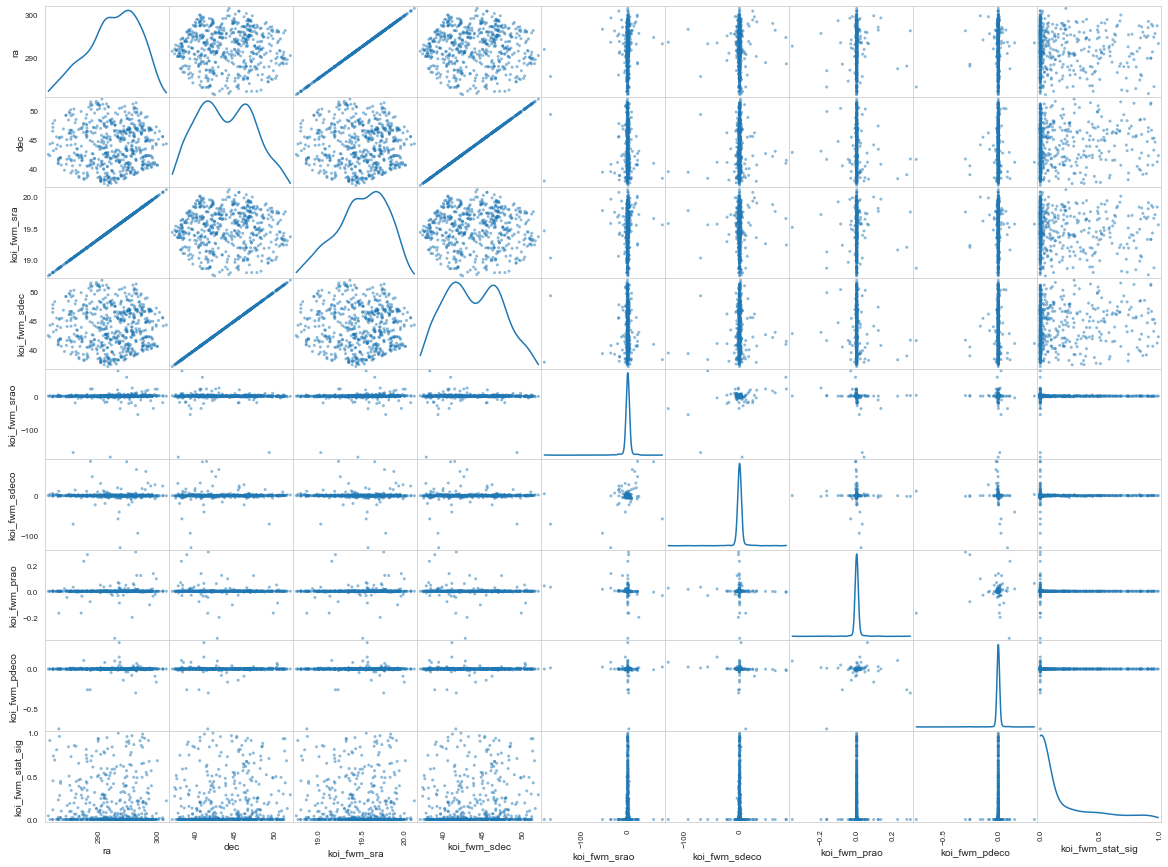

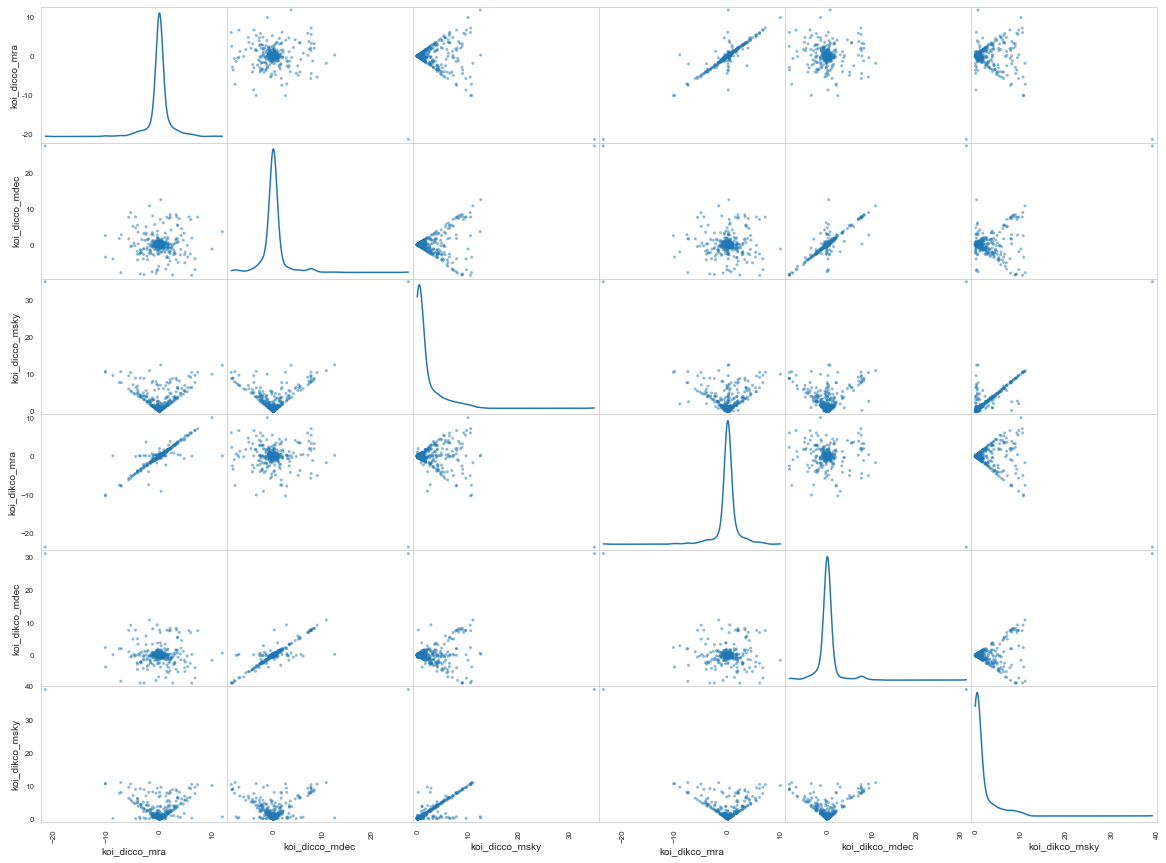

In [14]:
sns.set_style("whitegrid", {'axes.grid' : False})
for x in xplot:
    pd.plotting.scatter_matrix(x, figsize=(20,15), diagonal='kde');

The features have various distributions and some outliers are observed in the data. The presence of outliers may impact the model performance, especially if there is overfitting.

### Plot correlation

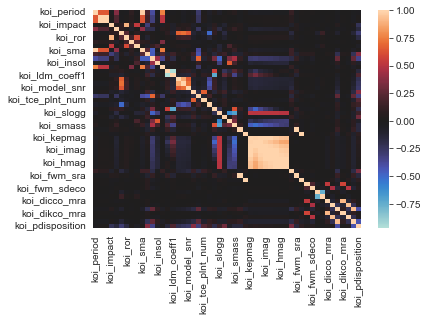

In [15]:
sns.heatmap(df_plot.corr(), center=0); # plot correlation of all features

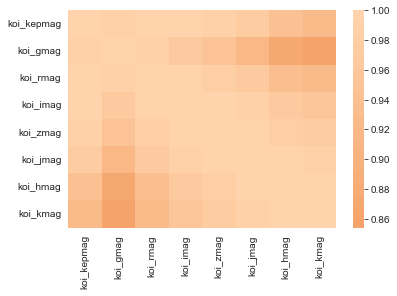

In [16]:
# plot correlation of feature subset - KIC parameters
sns.heatmap(koi_kic.corr(), center=0);

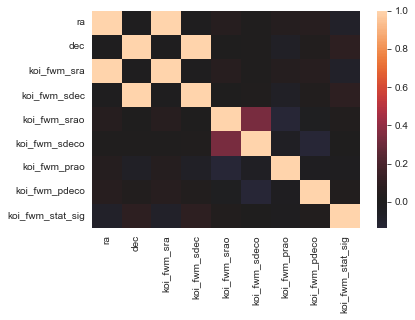

In [17]:
# plot correlation of feature subset - Pixel vetting statistics
sns.heatmap(koi_fwm.corr(), center=0);

Subsets of the features have high correlation, which could be used simplify the dataset by removing redundant features

# 2. Model training and validation

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

np.random.seed(42)

### Split data for training and test

In [19]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42) # use 80/20 split

In [20]:
# get prediction labels for train/test set
y_train = train_set.pop(target_attr)
X_train = train_set.copy()

y_test = test_set.pop(target_attr)
X_test = test_set.copy()

### Define function to train & GridSearch for any estimator

In [21]:
def modelTrain(X, y, estimator_name, estimator, param_grid, cv=3, scoring='accuracy'):
    
    #Define pipeline to scale data
    pipeline = Pipeline(steps=[
            ("scaler", StandardScaler()),
            (estimator_name, estimator)
        ])
    
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv,
                           scoring=scoring,
                           return_train_score=True)

    return grid_search.fit(X, y)

### Train on default models as baseline

In [22]:
def init_default():
    return [
        SGDClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(random_state=42),
        ExtraTreesClassifier(random_state=42),
        SVC(),
        DecisionTreeClassifier()
    ]

def calc_metrics(model, X, y):
    y_hat = model.predict(X)
    metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    scores = [fn(y, y_hat) for fn in metrics]
    return scores

In [23]:
scaler = StandardScaler() # scale all features

X_tr_std = scaler.fit_transform(X_train)
X_te_std = scaler.transform(X_test)

In [24]:
models = init_default()
model_names = [str(model).split('(')[0] for model in models]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

fit_models = []
fit_metrics = []

for model in models:
    fit_models.append(model.fit(X_tr_std, y_train))
    fit_metrics.append(calc_metrics(model, X_te_std, y_test))

In [25]:
# 51 feature dataset - no missing values
default_metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
default_metrics

,Accuracy,Precision,Recall,F1,AUC
SGDClassifier,0.933433,0.942590,0.938830,0.940706,0.932663
KNeighborsClassifier,0.875841,0.843091,0.957447,0.896638,0.864193
RandomForestClassifier,0.941660,0.948138,0.948138,0.948138,0.940736
ExtraTreesClassifier,0.938669,0.950269,0.940160,0.945187,0.938456
SVC,0.918474,0.912709,0.945479,0.928805,0.914620
DecisionTreeClassifier,0.902767,0.920270,0.905585,0.912869,0.902365


### Train on Linear model

In [26]:
sgd_clf = SGDClassifier(random_state=42)

param_grid = [
    {'sgd_clf__max_iter': [100, 1000, 10000]}
  ]

sgd_clf_model = modelTrain(X_train, y_train, 'sgd_clf', sgd_clf, param_grid, 5, 'accuracy')

In [27]:
sgd_clf_model.best_params_

{'sgd_clf__max_iter': 100}

In [28]:
y_test_pred = sgd_clf_model.predict(X_test)
sgd_clf_acc = accuracy_score(y_test, y_test_pred)
sgd_clf_acc, sgd_clf_model.best_score_

(0.9334330590875094, 0.8999064546304958)

The prediction on test data is better as the test score has increased from the training score

### Confusion Matrix for Linear model

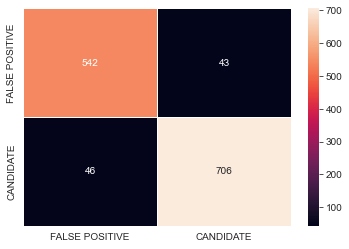

In [29]:
conf_mx = confusion_matrix(y_test, y_test_pred)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
plt.yticks(va="center");

### Train on K Nearest Neighbors model

In [31]:
knn = KNeighborsClassifier(n_jobs=-1)

param_grid = [
    {'knn__weights': ['uniform', 'distance'],
     'knn__n_neighbors': [5, 10, 20, 30],
     'knn__p': [1, 2],
     'knn__leaf_size': [5, 10, 30, 50]}
]

knn_clf = modelTrain(X_train, y_train, 'knn', knn, param_grid, 5, 'accuracy')

In [32]:
knn_clf.best_params_

{'knn__leaf_size': 5,
 'knn__n_neighbors': 10,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [33]:
y_test_pred_knn = knn_clf.predict(X_test)
knn_clf_acc = accuracy_score(y_test, y_test_pred_knn)
knn_clf_acc, knn_clf.best_score_

(0.8825729244577412, 0.8804490177736202)

KNN performance is similar between train and test scores

### Confusion Matrix for KNN model

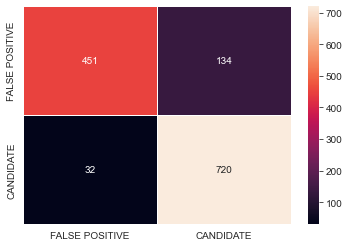

In [32]:
conf_mx = confusion_matrix(y_test, y_test_pred_knn)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
plt.yticks(va="center");

### Train on SVC model

In [51]:
#SVC

svc = SVC(random_state=42)

param_grid = [{'svc__kernel' : ['linear', 'rbf', 'poly'],
                'svc__degree' :[0, 1, 2, 3, 4, 5, 6],
              'svc__C' : [1,5,10,1000]}]

svc_model = modelTrain(X_train, y_train, 'svc', svc, param_grid, 5, 'accuracy')

In [52]:
svc_model.best_params_

{'svc__C': 5, 'svc__degree': 0, 'svc__kernel': 'rbf'}

In [53]:
y_test_pred_svc = svc_model.predict(X_test)
svc_acc = accuracy_score(y_test, y_test_pred_svc)
svc_acc, svc_model.best_score_

(0.9267015706806283, 0.9189897100093546)

The SVC performed good on prediction, the score is slightly more than the training score

### Confusion Matrix for SVC model

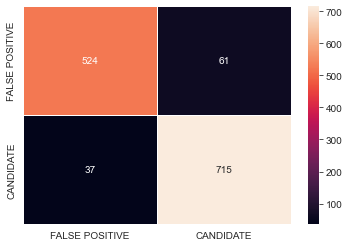

In [55]:
conf_mx = confusion_matrix(y_test, y_test_pred_svc)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
plt.yticks(va="center");

### Train on Random Forest Model

In [33]:
#RF

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

param_grid = [{'rfc__n_estimators' : [500, 1000, 1500],
               'rfc__max_leaf_nodes' :[15, 20, 25],
               'rfc__max_depth' : [i for i in range(8, 11)]}]

rnd_clf = modelTrain(X_train, y_train, 'rfc', rfc, param_grid, 5, 'accuracy')

In [34]:
rnd_clf.best_params_

{'rfc__max_depth': 9, 'rfc__max_leaf_nodes': 25, 'rfc__n_estimators': 500}

In [35]:
y_pred_rf = rnd_clf.predict(X_test)

In [36]:
rfc_acc = accuracy_score(y_test, y_pred_rf)
rfc_acc, rnd_clf.best_score_

(0.9334330590875094, 0.9171188026192704)

The RF performed well on prediction, the test score is higher than the training score

### Confusion Matrix for RF model

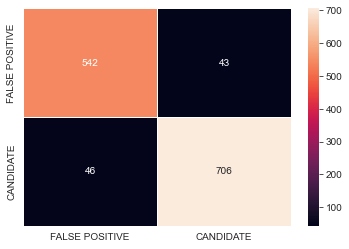

In [37]:
conf_mx = confusion_matrix(y_test, y_pred_rf)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
plt.yticks(va="center");

### Train on Extra Trees model

In [38]:
# setup parameter search grid
param_grid = [{
    'et__n_estimators': [75, 100, 125, 150],
    'et__max_depth': [30, 35, 40, 45], 
    'et__min_samples_split': [10, 15, 25, 45]
}]

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
et_clf = modelTrain(X_train, y_train, 'et', et, param_grid, 5, 'accuracy')

In [39]:
et_clf.best_params_

{'et__max_depth': 35, 'et__min_samples_split': 10, 'et__n_estimators': 125}

In [40]:
y_pred_et = et_clf.predict(X_test)
et_acc = accuracy_score(y_test, y_pred_et)
et_acc, et_clf.best_score_

(0.9394166043380703, 0.9238540692235734)

The ET performed well on prediction, the test score is slightly higher than the training score

### Confusion Matrix for ET model

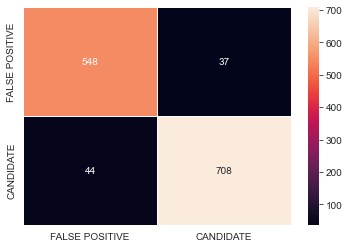

In [41]:
conf_mx = confusion_matrix(y_test, y_pred_et)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
plt.yticks(va="center");

### Evaluate default models with imputed dataset

In [42]:
data_imp = df_clean.copy() # get data before missing rows removed
data_imp[target_attr] = data[target_attr].map(target_vals) # get prediction labels

y = data_imp.pop(target_attr)
X_imp = data_imp.copy()

X2_train, X2_test, y2_train, y2_test = train_test_split(X_imp, y, test_size=0.2, random_state=42) # use 80/20 split

In [43]:
preprocess = Pipeline([
            ("imputer",SimpleImputer(strategy="constant", fill_value=0)), # replace missing data with 0s
            ("scaler", StandardScaler())
        ])

X_tr_imp = preprocess.fit_transform(X2_train)
X_te_imp = preprocess.transform(X2_test)

In [44]:
# train on default models with imputed dataset - replace with 0s
models_imp = init_default()
fit_models = []
fit_metrics = []

for model in models_imp:
    fit_models.append(model.fit(X_tr_imp, y2_train))
    fit_metrics.append(calc_metrics(model, X_te_imp, y2_test))
    
imp_metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
imp_metrics

,Accuracy,Precision,Recall,F1,AUC
SGDClassifier,0.852588,0.858628,0.849794,0.854188,0.852634
KNeighborsClassifier,0.839519,0.813384,0.887860,0.848992,0.838723
RandomForestClassifier,0.904339,0.935912,0.871399,0.902504,0.904881
ExtraTreesClassifier,0.890748,0.909774,0.871399,0.890173,0.891066
SVC,0.866702,0.868448,0.869342,0.868895,0.866658
DecisionTreeClassifier,0.854679,0.870726,0.838477,0.854298,0.854945


Performance with imputed data is much lower than baseline

### Evaluate default models with redundant features removed from dataset

In [45]:
drop_list = [
    'koi_time0bk', # high corr with koi_time0
    'koi_fwm_sra','koi_fwm_sdec', # high corr with ra, dec
    'koi_imag', # high corr with kepmag, zmag
    'koi_jmag', # high corr with zmag, hmag, kmag
]

# drop columns of redundant features
X_train_red = X_train.drop(drop_list, axis=1)
X_test_red = X_test.drop(drop_list, axis=1)

# scale dataset - redundant features removed
scaler_red = StandardScaler()
X_tr_red = scaler_red.fit_transform(X_train_red)
X_te_red = scaler_red.transform(X_test_red)

In [46]:
# train on default models with reduced dataset - no missing values
models_red = init_default()
fit_models = []
fit_metrics = []

for model in models_red:
    fit_models.append(model.fit(X_tr_red, y_train))
    fit_metrics.append(calc_metrics(model, X_te_red, y_test))
    
red_metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
red_metrics

,Accuracy,Precision,Recall,F1,AUC
SGDClassifier,0.908003,0.927891,0.906915,0.917283,0.908158
KNeighborsClassifier,0.881077,0.851720,0.954787,0.900313,0.870556
RandomForestClassifier,0.941660,0.949333,0.946809,0.948069,0.940926
ExtraTreesClassifier,0.940165,0.948000,0.945479,0.946738,0.939406
SVC,0.924458,0.918919,0.949468,0.933944,0.920888
DecisionTreeClassifier,0.910995,0.925976,0.914894,0.920401,0.910438


Some improvement in performance when compared to models trained with imputed data, but still lower than baseline

### Evaluate default models with PCA applied to all features

In [47]:
variance = 0.95
full_pca = Pipeline([
    ('standardize', StandardScaler()), # scale to center data for PCA
    ('PCA', PCA(n_components=variance)), # apply PCA all features
])

X_tr_pca = full_pca.fit_transform(X_train)
X_te_pca = full_pca.transform(X_test)

In [48]:
# train on default models with PCA on all features - no missing values dataset
models_pca = init_default()
fit_models = []
fit_metrics = []

for model in models_pca:
    fit_models.append(model.fit(X_tr_pca, y_train))
    fit_metrics.append(calc_metrics(model, X_te_pca, y_test))
    
pca_metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
pca_metrics

,Accuracy,Precision,Recall,F1,AUC
SGDClassifier,0.902767,0.926027,0.898936,0.912281,0.903314
KNeighborsClassifier,0.873598,0.845789,0.948138,0.894044,0.862958
RandomForestClassifier,0.907255,0.925474,0.908245,0.916779,0.907114
ExtraTreesClassifier,0.903515,0.908257,0.921543,0.914851,0.900942
SVC,0.914734,0.911082,0.940160,0.925393,0.911105
DecisionTreeClassifier,0.845924,0.872951,0.849734,0.861186,0.845380


PCA applied to all features results in lower performance from baseline and when trained using imputed data

### Evaluate default models with PCA applied to subset of features

In [49]:
num_attr = list(X_train) # get list of all features
pca_attr = ['koi_kepmag','koi_gmag','koi_rmag','koi_imag','koi_zmag','koi_jmag','koi_hmag','koi_kmag'] # get subset for PCA
pca_subset = ColumnTransformer([
    ('scale', StandardScaler(), num_attr), # scale all features
    ('PCA', PCA(n_components=variance), pca_attr), # apply PCA to subset
])

X_tr_pca_sub = pca_subset.fit_transform(X_train)
X_te_pca_sub = pca_subset.transform(X_test)

In [50]:
# train on default models with PCA on subset features - no missing values dataset
models_pca = init_default()
fit_models = []
fit_metrics = []

for model in models_pca:
    fit_models.append(model.fit(X_tr_pca_sub, y_train))
    fit_metrics.append(calc_metrics(model, X_te_pca_sub, y_test))
    
pca2_metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
pca2_metrics

,Accuracy,Precision,Recall,F1,AUC
SGDClassifier,0.908751,0.899746,0.942819,0.920779,0.903888
KNeighborsClassifier,0.869858,0.838407,0.952128,0.891656,0.858115
RandomForestClassifier,0.941660,0.950535,0.945479,0.948000,0.941115
ExtraTreesClassifier,0.934181,0.942667,0.940160,0.941411,0.933328
SVC,0.915482,0.908046,0.945479,0.926384,0.911201
DecisionTreeClassifier,0.897532,0.916103,0.900266,0.908115,0.897142


PCA applied to subset of features (with high correlation) performed better than when applied to all features, and is comparable to when redundant features are removed from the dataset completely

## 3. Conclusion

The Random Forest performed best as it had the highest accuracy score and is balanced in other metrics. 

Tuning and training the models with different datasets did not yield better performance than the default models.

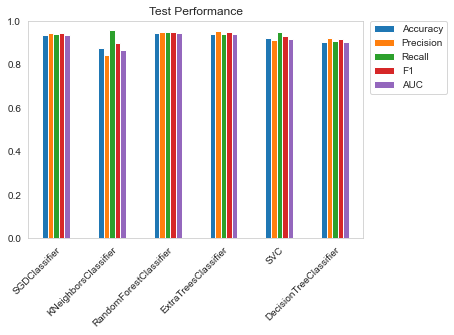

In [57]:
default_metrics.plot.bar() # plot test scores of default models
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('Test Performance');